<a href="https://colab.research.google.com/github/e-abtahi/Statistical_Analysis_Portfolio/blob/main/Application_Case_Titan_Insurance/Titan_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Background:
The Titan Insurance Company has just installed a new incentive payment scheme for its lift policy sales force. It wants to have an early view of the success or failure of the new scheme. Indications are that the sales force is selling more policies but sales always vary in an unpredictable pattern from month to month and it is not clear that the scheme has made a significant difference.

Life Insurance companies typically measure the monthly output of a salesperson as the total sum assured for the policies sold by that person during the month. For example, suppose salesperson X has, in the month, sold seven policies for which the sums assured are £1000, £2500, £3000,£5000, £10000, £35000. X's output for the month is the total of these sums assured, £61,500. Titan's new scheme is that the sales force receive low regular salaries but are paid large bonuses related to their output (i.e. to the total sum assured of policies sold by them). The scheme is expensive for the company but they are looking for sales increases which more than compensate. The agreement with the sales force is that if the scheme does not at least break even for the company, it will be abandoned after six months.

The scheme has now been in operation for four months. It has settled down after fluctuations in the first two months due to the changeover. To test the effectiveness of the scheme, Titan have taken a random sample of 30 salespeople measured their output in the penultimate month prior to changeover and then measured it in the fourth month after the changeover (they have deliberately chosen months not too close to the changeover).

## Key Questions:

i) Describe the hypothesis test you would apply to these data to determine whether new scheme has significantly raised outputs. Use level of significance = 5%

ii) What conclusion does the test lead to?

iii) What reservations have you about this result?

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# Importing CSV

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

df = pd.read_csv('/content/drive/MyDrive/Titan+Inssurence+Output.csv',encoding='ISO-8859-1') # read the data as a data frame

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Checking the top 5 rows

In [7]:
df.head()

,Salesperson,Old Scheme,New Scheme
0,1,57,62
1,2,103,122
2,3,59,54
3,4,75,82
4,5,84,84


# Checking Summary of data

In [8]:
df.describe()

,Salesperson,Old Scheme,New Scheme
count,30.000000,30.000000,30.000000
mean,15.500000,68.033333,72.033333
std,8.803408,20.455980,24.062395
min,1.000000,28.000000,32.000000
25%,8.250000,54.000000,55.000000
50%,15.500000,67.000000,74.000000
75%,22.750000,81.500000,85.750000
max,30.000000,110.000000,122.000000


# Check for missing values

In [9]:
# Check for missing value in any colum
df.isnull().sum()

Salesperson    0
Old Scheme     0
New Scheme     0
dtype: int64

There are no missing values in the dataset.

# Plot Histograms and boxplot

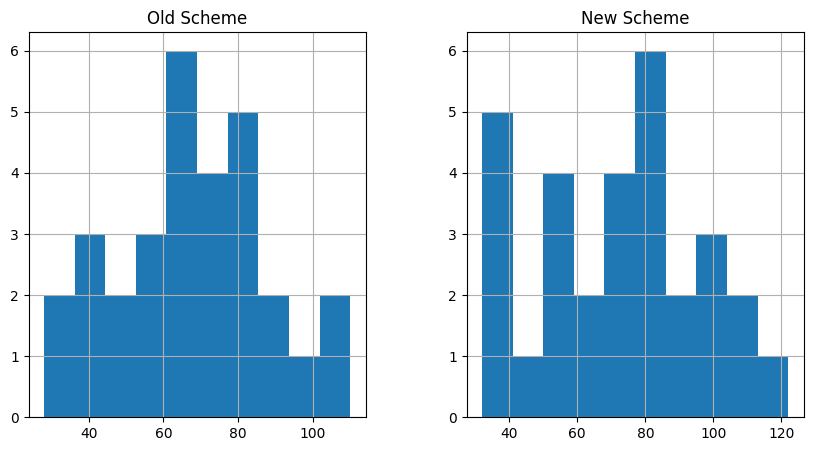

In [10]:
df.iloc[:,1:3].hist(figsize=(10,5))
plt.show()

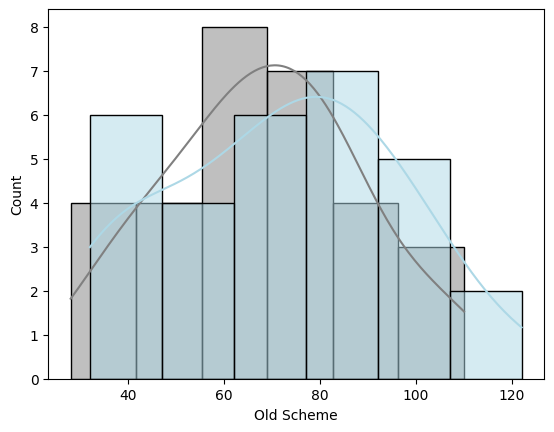

In [11]:
sns.histplot(df["Old Scheme"],color="grey", kde = True)
sns.histplot(df["New Scheme"],color="lightblue", kde = True)
plt.show()

<Axes: >

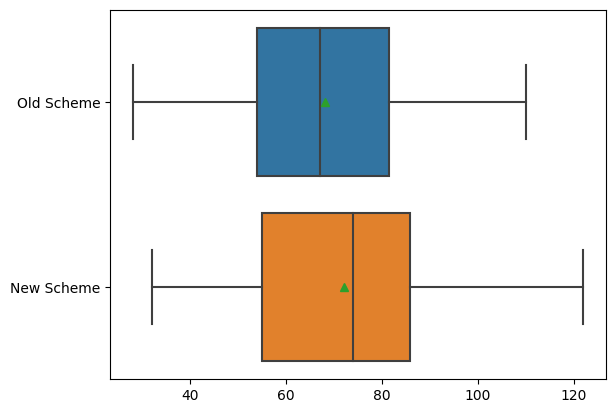

In [12]:
sns.boxplot(data=df[["Old Scheme","New Scheme"]],orient="h",showmeans=True)

* Mean and median of new scheme is slightly higher than the old scheme.

# Describe the five per cent significance test you would apply to these data to determine whether new scheme has significantly raised outputs?

- The level of significance ($\alpha$) = 0.05.

- The sample size , N = 30 which is sufficiently large for a z-test.

- But since the population standard deviation ($\sigma$) is unknown, we have to use a t-test.

- Degree of Freedom: We have N-1 degrees of freedom : 29

- Since the sole purpose of the test is to check whether the new scheme is successful compared to old scheme, we would prefer a right tailed t-test.

Hypothesis Formulation

Use the paired sample t-test

- $H_0: \mu_{new} = \mu_{old}$      (New Scheme did not raise the output significantly)

- $H_a: \mu_{new} > \mu_{old}  $      (New Scheme raised the output significantly)

In [13]:
t, p_value  = stats.ttest_rel(df['New Scheme'],df['Old Scheme'], alternative = 'greater')  #Performing a paired t-test

print(t, p_value)

1.5559143823544377 0.06528776980668831


#### Note: The value of the test statistic does not change for a two-tailed test or a one-tailed test. Only the pvalue or the probability value associated with the test statistic changes.

In [14]:
print ('The T statistic is:',t,'\n''The corresponding pvalue is :',p_value)

The T statistic is: 1.5559143823544377 
The corresponding pvalue is : 0.06528776980668831


# What conclusion does the test lead to?

In this scenario, the p value is 0.065 which is greater than the 0.05. Hence, we fail to reject the null hypothesis.

This means that the new scheme did not raise the output significantly.

# What reservations do you have about this result?

- If we compare the means of the two sample distributions, we see that even though visually it seems as if New scheme has fared better, statistically it does not hold.
- The higher mean in the case of New scheme can also be attributed to the higher variance compared to Old Scheme.
- The variance of the second data set, 579.00, is 38% more than the variance of the first data set, 418.45. (Squaring of the standard deviation values gives us the values of the variance)
- We are unsure of the sampling error present in the data.
- Unpredictable pattern persist even after the bonus scheme direct the management to work on the lift (product portfolio) and to correct the bonus scheme in proportion to revenue generation rather than policy sale.
- The scheme is expensive for the company but they are looking to compensate it by increase in sales. The agreement with the sales force is that if the scheme does not at least break even for the company, it will be abandoned after six months. So, it's better for the management to wait for another two months.
- There can be a dip in the New Scheme towards end of the cycle, which suggests that the Sales team may have booked all their sales at the earlier part of the period to get their incentives early or may be waiting till the end of quarter (measurement period) to book all their sales at once. Hence aggregation of data for a quarter may provide more clarity on the performance than for a single month.